In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.head()
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [4]:
df.shape

(17898, 9)

In [5]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [6]:
df.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [7]:
cols = ['mean_profile', 'std_profile', 'Excess_kurtosis_profile', 'skew_profile', 'mean_dmsnr', 'std_dmsnr', 'excess_kurtosis_dmsnr', 'skew_dmsnr', 'target_class']
print(len(cols))

9


In [11]:
data = np.array(df)
df = pd.DataFrame(data, columns = cols)
df.head()
df

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0.0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0.0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0.0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0.0


Text(0.5,1,'Pulsar (1) vs Non-Pulsar (0) Count')

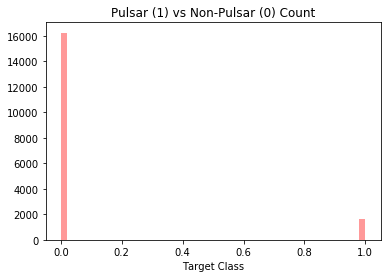

In [8]:
targets = np.array(df["target_class"])
sns.distplot(targets, kde = False, color = "r", axlabel = "Target Class").set_title("Pulsar (1) vs Non-Pulsar (0) Count")

In [9]:
star_data = []
notstar_data =[]

for i in range(df["target_class"].count()):
    if df["target_class"][i] == 1:
        star_data.append(df.loc[i])
    else:
        notstar_data.append(df.loc[i])

In [10]:
len(star_data) + len(notstar_data)


17898

In [15]:
dfstar = pd.DataFrame(star_data, columns = cols )
dfnotstar = pd.DataFrame(notstar_data, columns = cols)

In [17]:
dfstar.head()
dfstar

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1.0
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1.0
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1.0
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1.0
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1.0
100,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364,1.0
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1.0
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1.0
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1.0
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1.0


In [20]:
dfstar = dfstar.reset_index(drop = True)
dfnotstar = dfnotstar.reset_index(drop = True)
dfstar.head()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1.0
1,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1.0
2,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1.0
3,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1.0
4,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1.0


In [21]:
dfnotstar.head()
dfnotstar

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0.0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0.0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0.0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0.0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0.0


In [22]:
dfnotstar.describe()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
count,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.000000,16259.0
mean,116.562726,47.339741,0.210440,0.380844,8.863258,23.287984,8.862674,113.620344,0.0
std,17.475932,6.182929,0.334606,1.027791,24.411409,16.651426,4.238626,106.721930,0.0
min,17.210938,28.698714,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.0
25%,105.253906,43.384645,0.008650,-0.221980,1.857023,14.138541,6.615374,47.580165,0.0
50%,117.257812,47.485647,0.186665,0.124107,2.635452,17.618420,8.760010,90.674592,0.0
75%,128.285156,51.315620,0.392892,0.663383,4.227007,24.517386,10.935207,145.827223,0.0
max,192.617188,98.778911,4.785786,24.872429,223.392140,110.642211,34.539844,1191.000837,0.0


In [23]:
dfstar.describe()

,mean_profile,std_profile,Excess_kurtosis_profile,skew_profile,mean_dmsnr,std_dmsnr,excess_kurtosis_dmsnr,skew_dmsnr,target_class
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0
mean,56.690608,38.710598,3.130655,15.553576,49.825995,56.468963,2.757069,17.931728,1.0
std,30.007707,8.033614,1.872861,13.997200,45.287932,19.731080,3.105945,50.896263,0.0
min,5.812500,24.772042,-0.094888,-1.139069,0.486622,7.658623,-1.862320,-1.874683,1.0
25%,31.777344,32.284803,1.556038,3.805492,12.759615,43.333643,0.756451,-0.228294,1.0
50%,54.296875,37.341297,2.961258,11.609644,33.494983,59.367088,1.918327,2.585145,1.0
75%,79.277344,43.759278,4.586930,24.881853,78.313545,70.985965,3.709978,13.469687,1.0
max,139.257812,83.796909,8.069522,68.101622,199.577759,109.655345,30.883882,1017.383180,1.0


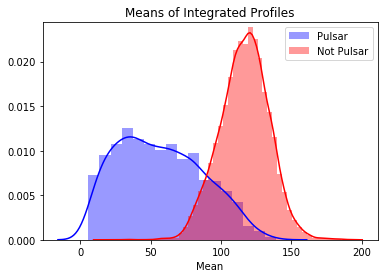

In [31]:
mean_star_profile = np.array(dfstar["mean_profile"])
mean_notstar_profile = np.array(dfnotstar["mean_profile"])
sns.distplot(mean_star_profile, color = "b", label = "Pulsar", axlabel = "Mean").set_title("Means of Integrated Profiles")
sns.distplot(mean_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

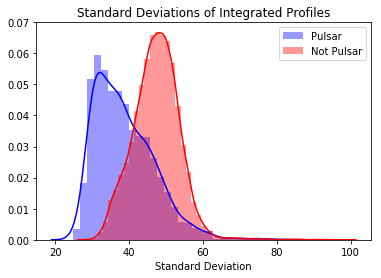

In [32]:
std_star_profile = np.array(dfstar["std_profile"])
std_notstar_profile = np.array(dfnotstar["std_profile"])
sns.distplot(std_star_profile, color = "b", label = "Pulsar", axlabel = "Standard Deviation").set_title("Standard Deviations of Integrated Profiles")
sns.distplot(std_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

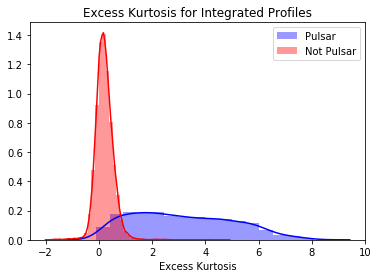

In [33]:
exkurt_star_profile = np.array(dfstar["Excess_kurtosis_profile"])
exkurt_notstar_profile = np.array(dfnotstar["Excess_kurtosis_profile"])
sns.distplot(exkurt_star_profile, color = "b", axlabel = "Excess Kurtosis", label = "Pulsar").set_title("Excess Kurtosis for Integrated Profiles")
sns.distplot(exkurt_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

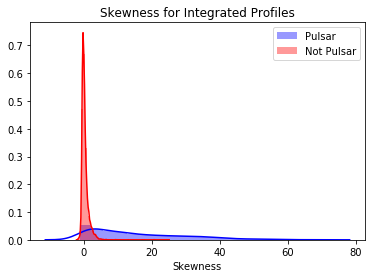

In [34]:
skew_star_profile = np.array(dfstar["skew_profile"])
skew_notstar_profile = np.array(dfnotstar["skew_profile"])
sns.distplot(skew_star_profile, color = "b", axlabel = "Skewness", label = "Pulsar").set_title("Skewness for Integrated Profiles")
sns.distplot(skew_notstar_profile, color = "r", label = "Not Pulsar")
plt.legend()

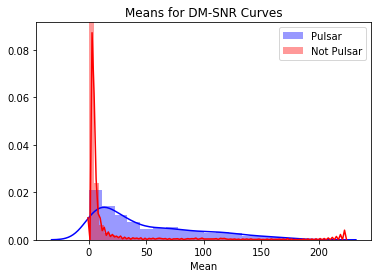

In [35]:
mean_star_dmsnr = np.array(dfstar["mean_dmsnr"])
mean_notstar_dmsnr = np.array(dfnotstar["mean_dmsnr"])
sns.distplot(mean_star_dmsnr, color = "b", axlabel = "Mean", label = "Pulsar").set_title("Means for DM-SNR Curves")
sns.distplot(mean_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

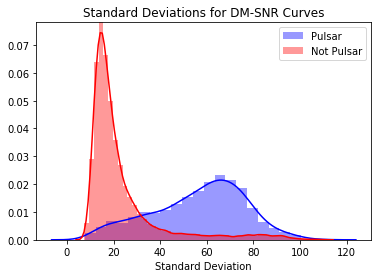

In [36]:
std_star_dmsnr = np.array(dfstar["std_dmsnr"])
std_notstar_dmsnr = np.array(dfnotstar["std_dmsnr"])
sns.distplot(std_star_dmsnr, color = "b", axlabel = "Standard Deviation", label = "Pulsar").set_title("Standard Deviations for DM-SNR Curves")
sns.distplot(std_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

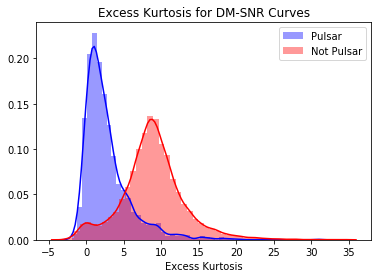

In [37]:
exkurt_star_dmsnr = np.array(dfstar["excess_kurtosis_dmsnr"])
exkurt_notstar_dmsnr = np.array(dfnotstar["excess_kurtosis_dmsnr"])
sns.distplot(exkurt_star_dmsnr, color = "b", axlabel = "Excess Kurtosis", label = "Pulsar").set_title("Excess Kurtosis for DM-SNR Curves")
sns.distplot(exkurt_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

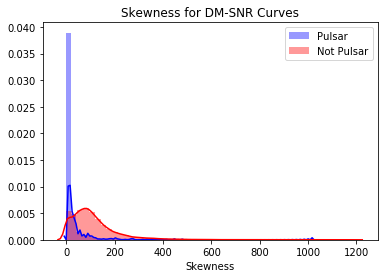

In [38]:
skew_star_dmsnr = np.array(dfstar["skew_dmsnr"])
skew_notstar_dmsnr = np.array(dfnotstar["skew_dmsnr"])
sns.distplot(skew_star_dmsnr, color = "b", axlabel = "Skewness", label = "Pulsar").set_title("Skewness for DM-SNR Curves")
sns.distplot(skew_notstar_dmsnr, color = "r", label = "Not Pulsar")
plt.legend()

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
X = np.array(df.drop("target_class", axis = 1))
y = np.array(df["target_class"])


In [25]:
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size = 0.27)

In [26]:
clf = svm.SVC(kernel = 'linear')

In [27]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print(accuracy_score(y_true, y_pred))

0.9801365611421478
